In [1]:
import pickle as pkl
import viz_sequence
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
import h5py
from scipy.special import softmax
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

#uncorrected model paths
model_5M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_10.01.2021_subsample_5M/with_k562_bias_final_model/"
model_25M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.30.2021_subsample_25M/with_k562_bias_final_model/"
model_50M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_10.01.2021_subsample_50M/with_k562_bias_final_model/"
model_100M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.30.2021_subsample_100M/with_k562_bias_final_model/"
model_500M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.29.2021_bias_filters_500/final_model_step3/"

#corrected model paths
#model_5M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_10.01.2021_subsample_5M/with_k562_bias_final_model/unplug/"
#model_25M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.30.2021_subsample_25M/with_k562_bias_final_model/unplug/"
#model_50M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_10.01.2021_subsample_50M/with_k562_bias_final_model/unplug/"
#model_100M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.30.2021_subsample_100M/with_k562_bias_final_model/unplug/"
#model_500M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.29.2021_bias_filters_500/final_model_step3/unplug/"
import numpy as np
from scipy.stats import entropy

In [2]:
def load_data(model_path):
    pfile=model_path+"model.0.predictions"
    f=h5py.File(pfile,'r')
    counts_labels=f['lab_1'][:]
    counts_pred=f['pred_1'][:]
    profile_labels=f['lab_0'][:]
    profile_pred=f['pred_0'][:]
    coord=f['coords'][:]
    coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
    coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
    print(coord_fixed[0])
    profile_pred_softmax=softmax(profile_pred,axis=1)
    return counts_labels, counts_pred, profile_labels, profile_pred_softmax

In [3]:
counts_labels_500M, counts_pred_500M, profile_labels_500M, profile_pred_softmax_500M = load_data(model_500M)
counts_labels_100M, counts_pred_100M, profile_labels_100M, profile_pred_softmax_100M = load_data(model_100M)
counts_labels_50M, counts_pred_50M, profile_labels_50M, profile_pred_softmax_50M = load_data(model_50M)
counts_labels_25M, counts_pred_25M, profile_labels_25M, profile_pred_softmax_25M = load_data(model_25M)
counts_labels_5M, counts_pred_5M, profile_labels_5M, profile_pred_softmax_5M = load_data(model_5M)

['chr1', '42280', '.']
['chr1', '42280', '.']
['chr1', '42280', '.']
['chr1', '42280', '.']
['chr1', '42280', '.']


In [4]:
def jsd_pred(profile1_preds, profile2_preds):
    jsd_vals=[]
    for i in range(profile1_preds.shape[0]):
        jsd_val = jensenshannon(profile1_preds[i], profile2_preds[i])
        if not np.isnan(jsd_val):
            jsd_vals.append(jsd_val)
    
    return [np.mean(jsd_vals), np.std(jsd_vals)], jsd_vals

In [5]:
# pearsonr with observed 500M
print("observed 500M vs observed 100M counts pearsonr", pearsonr(counts_labels_500M, counts_labels_100M))
print("observed 500M vs observed 50M counts pearsonr", pearsonr(counts_labels_500M, counts_labels_50M))
print("observed 500M vs observed 25M counts pearsonr", pearsonr(counts_labels_500M, counts_labels_25M))
print("observed 500M vs observed 5M counts pearsonr", pearsonr(counts_labels_500M, counts_labels_5M))
print("\n")

# spearmanr with observed 500M
print("observed 500M vs observed 100M counts pearsonr", spearmanr(counts_labels_500M, counts_labels_100M))
print("observed 500M vs observed 50M counts pearsonr", spearmanr(counts_labels_500M, counts_labels_50M))
print("observed 500M vs observed 25M counts pearsonr", spearmanr(counts_labels_500M, counts_labels_25M))
print("observed 500M vs observed 5M counts pearsonr", spearmanr(counts_labels_500M, counts_labels_5M))
print("\n")

# JSD with observed 500M
stats_o500M_vs_o100M, vals_o500M_vs_o100M = jsd_pred(profile_labels_500M, profile_labels_100M)
print("observed 500M vs predicted 100M JSD", stats_o500M_vs_o100M)

stats_o500M_vs_o50M, vals_o500M_vs_o50M = jsd_pred(profile_labels_500M, profile_labels_50M)
print("observed 500M vs predicted 50M  JSD", stats_o500M_vs_o50M)

stats_o500M_vs_o25M, vals_o500M_vs_o25M = jsd_pred(profile_labels_500M, profile_labels_25M)
print("observed 500M vs predicted 25M  JSD", stats_o500M_vs_o25M)

stats_o500M_vs_o5M, vals_o500M_vs_o5M = jsd_pred(profile_labels_500M, profile_labels_5M)
print("observed 500M vs predicted 5M  JSD", stats_o500M_vs_o5M)

observed 500M vs observed 100M counts pearsonr (0.9961982791321962, 0.0)
observed 500M vs observed 50M counts pearsonr (0.9917724518600032, 0.0)
observed 500M vs observed 25M counts pearsonr (0.9826070769506122, 0.0)
observed 500M vs observed 5M counts pearsonr (0.9195286190770665, 0.0)


observed 500M vs observed 100M counts pearsonr SpearmanrResult(correlation=0.9959523825768674, pvalue=0.0)
observed 500M vs observed 50M counts pearsonr SpearmanrResult(correlation=0.9913491769025863, pvalue=0.0)
observed 500M vs observed 25M counts pearsonr SpearmanrResult(correlation=0.9828933294372508, pvalue=0.0)
observed 500M vs observed 5M counts pearsonr SpearmanrResult(correlation=0.9253334716393816, pvalue=0.0)


observed 500M vs predicted 100M JSD [0.3734537453182626, 0.09376044535737181]
observed 500M vs predicted 50M  JSD [0.4714644647182462, 0.10138024068306396]
observed 500M vs predicted 25M  JSD [0.560266836660312, 0.09881630377750686]


/users/anusri/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)


observed 500M vs predicted 5M  JSD [0.7134646456316033, 0.06781167261318206]


In [1]:
plt.figure(figsize=(8, 6))
ecdf = ECDF(vals_o500M_vs_o100M)
plt.plot(ecdf.x, ecdf.y,label="100M observed vs 500M observed")
ecdf = ECDF(vals_o500M_vs_o50M)
plt.plot(ecdf.x, ecdf.y,label="100M observed vs 50M observed")
ecdf = ECDF(vals_o500M_vs_o25M)
plt.plot(ecdf.x, ecdf.y,label="25M observed vs 500M observed")
ecdf = ECDF(vals_o500M_vs_o5M)
plt.plot(ecdf.x, ecdf.y,label="25M observed vs 5M observed")
plt.legend()
plt.xlabel("JSD values")
plt.ylabel("ECDF")
plt.show()

NameError: name 'plt' is not defined

In [7]:
np.random.seed(1)
def normed_jsd(profile_preds, profile_preds_500M, obs_500M):
    jsd_vals=[]
    for i in range(profile_preds.shape[0]):
        x = jensenshannon(profile_preds[i], obs_500M[i])
        max_v = jensenshannon(profile_preds_500M[i], obs_500M[i])
        #j = np.random.choice(list( range(profile_preds.shape[0])),1)[0]
        #min_v = jensenshannon(profile_preds[i], obs_500M[j])
        #print(x, max_v, min_v)
        if not np.isnan(x):
            jsd_vals.append((x-1)/(max_v-1))
        #break
    
    return [np.mean(jsd_vals), np.std(jsd_vals)], jsd_vals
    

In [8]:
# normed JSD with observed 500M
norm_stats_o500M_vs_o100M, norm_vals_o500M_vs_o100M = normed_jsd(profile_pred_softmax_100M,profile_pred_softmax_500M,profile_labels_500M)
print("observed 500M vs predicted 100M JSD", norm_stats_o500M_vs_o100M)

norm_stats_o500M_vs_o50M, norm_vals_o500M_vs_o50M = normed_jsd(profile_pred_softmax_50M,profile_pred_softmax_500M,profile_labels_500M)
print("observed 500M vs predicted 50M  JSD", norm_stats_o500M_vs_o50M)

norm_stats_o500M_vs_o25M, norm_vals_o500M_vs_o25M = normed_jsd(profile_pred_softmax_25M,profile_pred_softmax_500M,profile_labels_500M)
print("observed 500M vs predicted 25M  JSD", norm_stats_o500M_vs_o25M)

norm_stats_o500M_vs_o5M, norm_vals_o500M_vs_o5M = normed_jsd(profile_pred_softmax_5M,profile_pred_softmax_500M,profile_labels_500M)
print("observed 500M vs predicted 5M  JSD", norm_stats_o500M_vs_o5M)

observed 500M vs predicted 100M JSD [0.9991185168085943, 0.023359327462403698]
observed 500M vs predicted 50M  JSD [0.9905009962528503, 0.028466364093870614]
observed 500M vs predicted 25M  JSD [0.9894980194641266, 0.028621742512249575]
observed 500M vs predicted 5M  JSD [0.978466271071939, 0.03488837688069619]


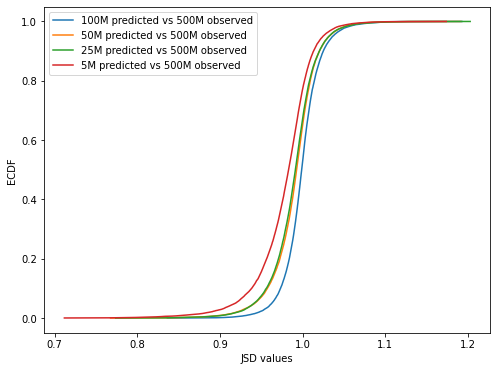

In [9]:
plt.figure(figsize=(8, 6))
ecdf = ECDF(norm_vals_o500M_vs_o100M)
plt.plot(ecdf.x, ecdf.y,label="100M predicted vs 500M observed")
#plt.hist(norm_vals_o500M_vs_o100M)
ecdf = ECDF(norm_vals_o500M_vs_o50M)
plt.plot(ecdf.x, ecdf.y,label="50M predicted vs 500M observed")
ecdf = ECDF(norm_vals_o500M_vs_o25M)
plt.plot(ecdf.x, ecdf.y,label="25M predicted vs 500M observed")
ecdf = ECDF(norm_vals_o500M_vs_o5M)
plt.plot(ecdf.x, ecdf.y,label="5M predicted vs 500M observed")
#print(norm_vals_o500M_vs_o100M)
plt.legend()
plt.xlabel("JSD values")
plt.ylabel("ECDF")
plt.show()

In [10]:
np.random.seed(1)
def normed_jsd(profile_preds, profile_preds_500M, obs_500M):
    jsd_vals=[]
    for i in range(profile_preds.shape[0]):
        x = jensenshannon(profile_preds[i], obs_500M[i])
        max_v = jensenshannon(profile_preds_500M[i], obs_500M[i])
        j = np.random.choice(list( range(profile_preds.shape[0])),1)[0]
        min_v = jensenshannon(profile_preds[i], obs_500M[j])
        #print(x, max_v, min_v)
        if not np.isnan(x):
            jsd_vals.append((x-min_v)/(max_v-min_v))
        #break
    
    return [np.mean(jsd_vals), np.std(jsd_vals)], jsd_vals
    

In [11]:
# normed JSD with observed 500M
norm_stats_o500M_vs_o100M, norm_vals_o500M_vs_o100M = normed_jsd(profile_pred_softmax_100M,profile_pred_softmax_500M,profile_labels_500M)
print("observed 500M vs predicted 100M JSD", norm_stats_o500M_vs_o100M)

norm_stats_o500M_vs_o50M, norm_vals_o500M_vs_o50M = normed_jsd(profile_pred_softmax_50M,profile_pred_softmax_500M,profile_labels_500M)
print("observed 500M vs predicted 50M  JSD", norm_stats_o500M_vs_o50M)

norm_stats_o500M_vs_o25M, norm_vals_o500M_vs_o25M = normed_jsd(profile_pred_softmax_25M,profile_pred_softmax_500M,profile_labels_500M)
print("observed 500M vs predicted 25M  JSD", norm_stats_o500M_vs_o25M)

norm_stats_o500M_vs_o5M, norm_vals_o500M_vs_o5M = normed_jsd(profile_pred_softmax_5M,profile_pred_softmax_500M,profile_labels_500M)
print("observed 500M vs predicted 5M  JSD", norm_stats_o500M_vs_o5M)

observed 500M vs predicted 100M JSD [0.9985232437902111, 0.05917644001470082]
observed 500M vs predicted 50M  JSD [0.9828952229396531, 0.055980584358410315]
observed 500M vs predicted 25M  JSD [0.9812239156507929, 0.05793951074147919]
observed 500M vs predicted 5M  JSD [0.9602552557103404, 0.06841159773338001]


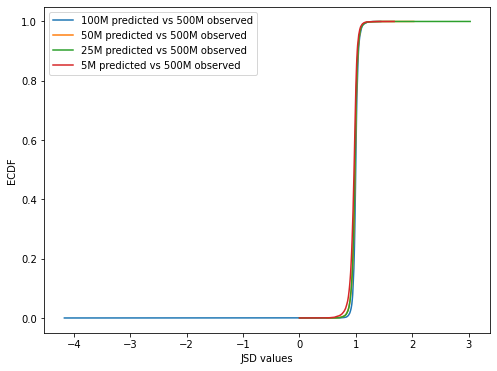

In [28]:
plt.figure(figsize=(8, 6))
ecdf = ECDF(norm_vals_o500M_vs_o100M)
plt.plot(ecdf.x, ecdf.y,label="100M predicted vs 500M observed")
#plt.hist(norm_vals_o500M_vs_o100M)
ecdf = ECDF(norm_vals_o500M_vs_o50M)
plt.plot(ecdf.x, ecdf.y,label="50M predicted vs 500M observed")
ecdf = ECDF(norm_vals_o500M_vs_o25M)
plt.plot(ecdf.x, ecdf.y,label="25M predicted vs 500M observed")
ecdf = ECDF(norm_vals_o500M_vs_o5M)
plt.plot(ecdf.x, ecdf.y,label="5M predicted vs 500M observed")
#print(norm_vals_o500M_vs_o100M)
plt.legend()
plt.xlabel("JSD values")
plt.ylabel("ECDF")
#plt.xlim(0,2)
plt.show()

In [13]:
# pearsonr with observed 500M
print("observed 500M vs predicted 500M counts pearsonr", pearsonr(counts_labels_500M, counts_pred_500M))
print("observed 500M vs predicted 100M counts pearsonr", pearsonr(counts_labels_500M, counts_pred_100M))
print("observed 500M vs predicted 50M counts pearsonr", pearsonr(counts_labels_500M, counts_pred_50M))
print("observed 500M vs predicted 25M counts pearsonr", pearsonr(counts_labels_500M, counts_pred_25M))
print("observed 500M vs predicted 5M counts pearsonr", pearsonr(counts_labels_500M, counts_pred_5M))
print("\n")

# spearmanr with observed 500M
print("observed 500M vs predicted 500M counts pearsonr", spearmanr(counts_labels_500M, counts_pred_500M))
print("observed 500M vs predicted 100M counts pearsonr", spearmanr(counts_labels_500M, counts_pred_100M))
print("observed 500M vs predicted 50M counts pearsonr", spearmanr(counts_labels_500M, counts_pred_50M))
print("observed 500M vs predicted 25M counts pearsonr", spearmanr(counts_labels_500M, counts_pred_25M))
print("observed 500M vs predicted 5M counts pearsonr", spearmanr(counts_labels_500M, counts_pred_5M))
print("\n")

# JSD with observed 500M
stats_o500M_vs_p500M, vals_o500M_vs_p500M = jsd_pred(profile_labels_500M, profile_pred_softmax_500M)
print("observed 500M vs predicted 500M JSD", stats_o500M_vs_p500M )

stats_o500M_vs_p100M, vals_o500M_vs_p100M = jsd_pred(profile_labels_500M, profile_pred_softmax_100M)
print("observed 500M vs predicted 100M JSD", stats_o500M_vs_p100M)

stats_o500M_vs_p50M, vals_o500M_vs_p50M = jsd_pred(profile_labels_500M, profile_pred_softmax_50M)
print("observed 500M vs predicted 50M  JSD", stats_o500M_vs_p50M)

stats_o500M_vs_p25M, vals_o500M_vs_p25M = jsd_pred(profile_labels_500M, profile_pred_softmax_25M)
print("observed 500M vs predicted 25M  JSD", stats_o500M_vs_p25M)

stats_o500M_vs_p5M, vals_o500M_vs_p5M = jsd_pred(profile_labels_500M, profile_pred_softmax_5M)
print("observed 500M vs predicted 5M  JSD", stats_o500M_vs_p5M)

observed 500M vs predicted 500M counts pearsonr (0.7308771762993654, 0.0)
observed 500M vs predicted 100M counts pearsonr (0.7357927664498213, 0.0)
observed 500M vs predicted 50M counts pearsonr (0.7200251524532392, 0.0)
observed 500M vs predicted 25M counts pearsonr (0.7185763841984227, 0.0)
observed 500M vs predicted 5M counts pearsonr (0.7019341751173365, 0.0)


observed 500M vs predicted 500M counts pearsonr SpearmanrResult(correlation=0.6761709628884184, pvalue=0.0)
observed 500M vs predicted 100M counts pearsonr SpearmanrResult(correlation=0.6831195662240774, pvalue=0.0)
observed 500M vs predicted 50M counts pearsonr SpearmanrResult(correlation=0.659654125700186, pvalue=0.0)
observed 500M vs predicted 25M counts pearsonr SpearmanrResult(correlation=0.6547958799537198, pvalue=0.0)
observed 500M vs predicted 5M counts pearsonr SpearmanrResult(correlation=0.633822885648295, pvalue=0.0)


observed 500M vs predicted 500M JSD [0.3024309912250342, 0.07035254368665123]
observed 500M vs p

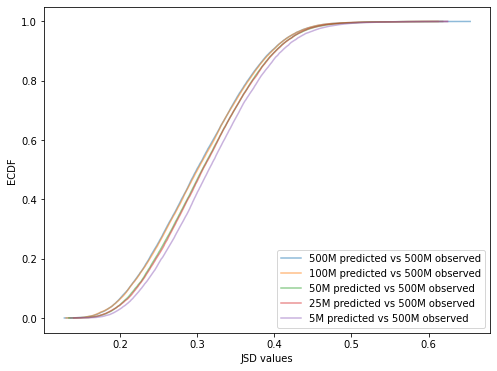

In [14]:
plt.figure(figsize=(8, 6))
ecdf = ECDF(vals_o500M_vs_p500M)
plt.plot(ecdf.x, ecdf.y,label="500M predicted vs 500M observed", alpha=0.5)
ecdf = ECDF(vals_o500M_vs_p100M)
plt.plot(ecdf.x, ecdf.y,label="100M predicted vs 500M observed", alpha=0.5)
ecdf = ECDF(vals_o500M_vs_p50M)
plt.plot(ecdf.x, ecdf.y,label="50M predicted vs 500M observed", alpha=0.5)
ecdf = ECDF(vals_o500M_vs_p25M)
plt.plot(ecdf.x, ecdf.y,label="25M predicted vs 500M observed", alpha=0.5)
ecdf = ECDF(vals_o500M_vs_p5M)
plt.plot(ecdf.x, ecdf.y,label="5M predicted vs 500M observed", alpha=0.5)
plt.legend()
plt.xlabel("JSD values")
plt.ylabel("ECDF")
plt.show()

In [15]:
# pearsonr with predicted 500M
print("predicted 500M vs predicted 100M counts pearsonr", pearsonr(counts_pred_500M, counts_pred_100M))
print("predicted 500M vs predicted 50M counts pearsonr", pearsonr(counts_pred_500M, counts_pred_50M))
print("predicted 500M vs predicted 25M counts pearsonr", pearsonr(counts_pred_500M, counts_pred_25M))
print("predicted 500M vs predicted 5M counts pearsonr", pearsonr(counts_pred_500M, counts_pred_5M))
print("\n")


# spearmanr with predicted 500M
print("predicted 500M vs predicted 100M counts pearsonr", spearmanr(counts_pred_500M, counts_pred_100M))
print("predicted 500M vs predicted 50M counts pearsonr", spearmanr(counts_pred_500M, counts_pred_50M))
print("predicted 500M vs predicted 25M counts pearsonr", spearmanr(counts_pred_500M, counts_pred_25M))
print("predicted 500M vs predicted 5M counts pearsonr", spearmanr(counts_pred_500M, counts_pred_5M))
print("\n")

# JSD with predicted 500M
stats_p500M_vs_p100M, vals_p500M_vs_p100M = jsd_pred(profile_pred_softmax_500M, profile_pred_softmax_100M)
print("predicted 500M vs predicted 100M JSD", stats_p500M_vs_p100M)

stats_p500M_vs_p50M, vals_p500M_vs_p50M = jsd_pred(profile_pred_softmax_500M, profile_pred_softmax_50M)
print("predicted 500M vs predicted 50M  JSD", stats_p500M_vs_p50M)

stats_p500M_vs_p25M, vals_p500M_vs_p25M = jsd_pred(profile_pred_softmax_500M, profile_pred_softmax_25M)
print("predicted 500M vs predicted 25M  JSD", stats_p500M_vs_p25M)

stats_p500M_vs_p5M, vals_p500M_vs_p5M = jsd_pred(profile_pred_softmax_500M, profile_pred_softmax_5M)
print("predicted 500M vs predicted 5M  JSD", stats_p500M_vs_p5M)

predicted 500M vs predicted 100M counts pearsonr (0.9368205724950651, 0.0)
predicted 500M vs predicted 50M counts pearsonr (0.905329570428735, 0.0)
predicted 500M vs predicted 25M counts pearsonr (0.9037921127896158, 0.0)
predicted 500M vs predicted 5M counts pearsonr (0.8917828285349267, 0.0)


predicted 500M vs predicted 100M counts pearsonr SpearmanrResult(correlation=0.8978172112148488, pvalue=0.0)
predicted 500M vs predicted 50M counts pearsonr SpearmanrResult(correlation=0.8473239832558225, pvalue=0.0)
predicted 500M vs predicted 25M counts pearsonr SpearmanrResult(correlation=0.8430858187701533, pvalue=0.0)
predicted 500M vs predicted 5M counts pearsonr SpearmanrResult(correlation=0.8240537464508557, pvalue=0.0)


predicted 500M vs predicted 100M JSD [0.08675474144318908, 0.025596621638524587]
predicted 500M vs predicted 50M  JSD [0.10049331891801144, 0.0313970136040871]
predicted 500M vs predicted 25M  JSD [0.10508142094196977, 0.031649291946721836]
predicted 500M vs predicted 

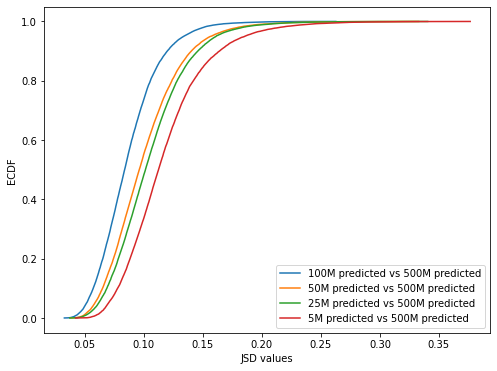

In [16]:
plt.figure(figsize=(8, 6))
ecdf = ECDF(vals_p500M_vs_p100M)
plt.plot(ecdf.x, ecdf.y,label="100M predicted vs 500M predicted")
ecdf = ECDF(vals_p500M_vs_p50M)
plt.plot(ecdf.x, ecdf.y,label="50M predicted vs 500M predicted")
ecdf = ECDF(vals_p500M_vs_p25M)
plt.plot(ecdf.x, ecdf.y,label="25M predicted vs 500M predicted")
ecdf = ECDF(vals_p500M_vs_p5M)
plt.plot(ecdf.x, ecdf.y,label="5M predicted vs 500M predicted")
plt.legend()
plt.xlabel("JSD values")
plt.ylabel("ECDF")
plt.show()

In [17]:
#print(len(counts_pred_25M))